In [1]:
#|default_exp_app

In [40]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].issupper()

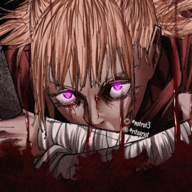

In [41]:
im = PILImage.create('kashi.jpg')
im.thumbnail((192, 192))
im

In [42]:
#|export
learn = load_learner('model.pkl')

In [43]:
%time learn.predict(im)

CPU times: total: 234 ms
Wall time: 179 ms


('Kashimo', tensor(0), tensor([0.7480, 0.2458, 0.0062]))

In [46]:
#|export
categories = ('Kashimo', 'Yuji', 'Yuta')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [47]:
classify_image(im)

{'Kashimo': 0.7480164170265198,
 'Yuji': 0.24582968652248383,
 'Yuta': 0.006153848022222519}

In [48]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['yuji.jpg', 'kashi.jpg', 'yuta.jpg']

intf = gr.Interface(fn = classify_image, inputs= image, outputs= label, examples = examples)
intf.launch(share=True, inline=False)

C:\Users\niran\AppData\Local\Temp\ipykernel_35028\634609530.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192, 192))
C:\Users\niran\AppData\Local\Temp\ipykernel_35028\634609530.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192, 192))
C:\Users\niran\AppData\Local\Temp\ipykernel_35028\634609530.py:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
C:\Users\niran\AppData\Local\Temp\ipykernel_35028\634609530.py:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Running on local URL:  http://127.0.0.1:7866
Running on public URL: https://a57227c04fd2ac2492.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
